In [1]:
import dateutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

In [2]:
fr_raw = pd.read_csv(r'..\data\search\peak_finder\Final_Results.csv').dropna(axis=1, how='all')
fr_norm = pd.read_csv(r'..\data\processed\lipidomics_linregress_normalized_data.csv')
fr_filt = pd.read_csv(r'..\data\processed\lipidomics_normalized_filtered_data.csv', index_col=0)
file_grouping = pd.read_csv(r'..\data\metadata\file_grouping.csv', index_col=0)

fr_quant_filenames_in_analytical_order = file_grouping[file_grouping['quant_file'] == True]['fr_name'].to_list()

animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic = [1076, 1082, 1101]
impaired = [1060, 1062, 1074, 1092, 1102]
normal = [1091, 1093]
bg_dict = {'diabetic': diabetic, 'impaired': impaired, 'normal': normal}
animal_to_tolerance_dict = {1076: 'diabetic', 1082: 'diabetic',1101: 'diabetic',
                            1060: 'impaired', 1062: 'impaired', 1074: 'impaired', 1092: 'impaired', 1102: 'impaired', 
                            1091: 'normal', 1093: 'normal',}

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')
metadata = pd.read_csv(r'..\data\metadata\20210923_huishi_metadata_scatterplot_request.csv', index_col=0)
metadata.index = metadata.index.str.split('M ').str[0].str.split('T').str[1]

In [7]:
x_val_type = 'OGTT (AUC)'

def make_lipid_class_vs_metadata_scatterplot(x_val_type, outfile_name):
    df = fr_filt
    num_lipid_classes = 10
    lipid_classes = df['Lipid Class'].value_counts().iloc[1:num_lipid_classes].to_dict()
    fig, axs = plt.subplots(nrows=num_lipid_classes-1, ncols=2, sharey='row', sharex=True, constrained_layout=True)
    fig.set_size_inches((9.5, num_lipid_classes*1.7))
    red = 'red'
    green = 'green'
    blue = 'blue'

    for i, lipid_class in enumerate(lipid_classes):
        for j, bg_type in enumerate(['RBG', 'FBG']):
            for k, animal in enumerate(animals_used):

                files = file_grouping[  (file_grouping['rat_label'] == animal) \
                                      & (file_grouping['bg_type'] == bg_type) \
                                      & (file_grouping['quant_file'] == True)]['fr_name']
                y_arr = np.log2(df[df['Lipid Class'] == lipid_class][files].mean(axis=1).median())
                x = metadata.loc[str(animal), x_val_type]
                tol_type = animal_to_tolerance_dict[animal]
                if tol_type == 'normal':
                    color = red
                elif tol_type == 'impaired':
                    color = green
                elif tol_type == 'diabetic':
                    color = blue
                ax = axs[i][j]
                ax.scatter(x, y_arr, color=color, s=65)
                if j == 1:
                    ax.set_ylabel(f'{lipid_class}\nn={lipid_classes[lipid_class]}', 
                                  rotation='horizontal',
                                  horizontalalignment='left',
                                  fontsize=14)
                    ax.yaxis.set_label_position('right')
                if i == 0:
                    ax.set_title('Random-fed' if j == 0 else 'Fasted', fontsize=15)

    fig.suptitle(f'Median log2 lipid class quant. vs.\n{x_val_type}', fontsize=20)
    fig.supylabel('log2 median feature quant', fontsize=18)
    fig.supxlabel(x_val_type, fontsize=20);

    # Legend
    legend_elements = [Line2D([0], [0], color='white', marker='o', markerfacecolor=red, label='Normal', markersize=17),
                       Line2D([0], [0], color='white', marker='o', markerfacecolor=green, label='Impaired', markersize=17),
                       Line2D([0], [0], color='white', marker='o', markerfacecolor=blue, label='Diabetic', markersize=17)]
    fig.legend(handles=legend_elements, loc='upper right', 
               fontsize=12, borderpad=0.2) 
    
#     plt.savefig(f'..\\reports\\collaborator reports\\Huishi request scatterplots heatmap 20210929\\{outfile_name}.png')

# plt.locator_params(axis='y', nbins=5)
# plt.legend(fontsize=16)
# plt.tight_layout()

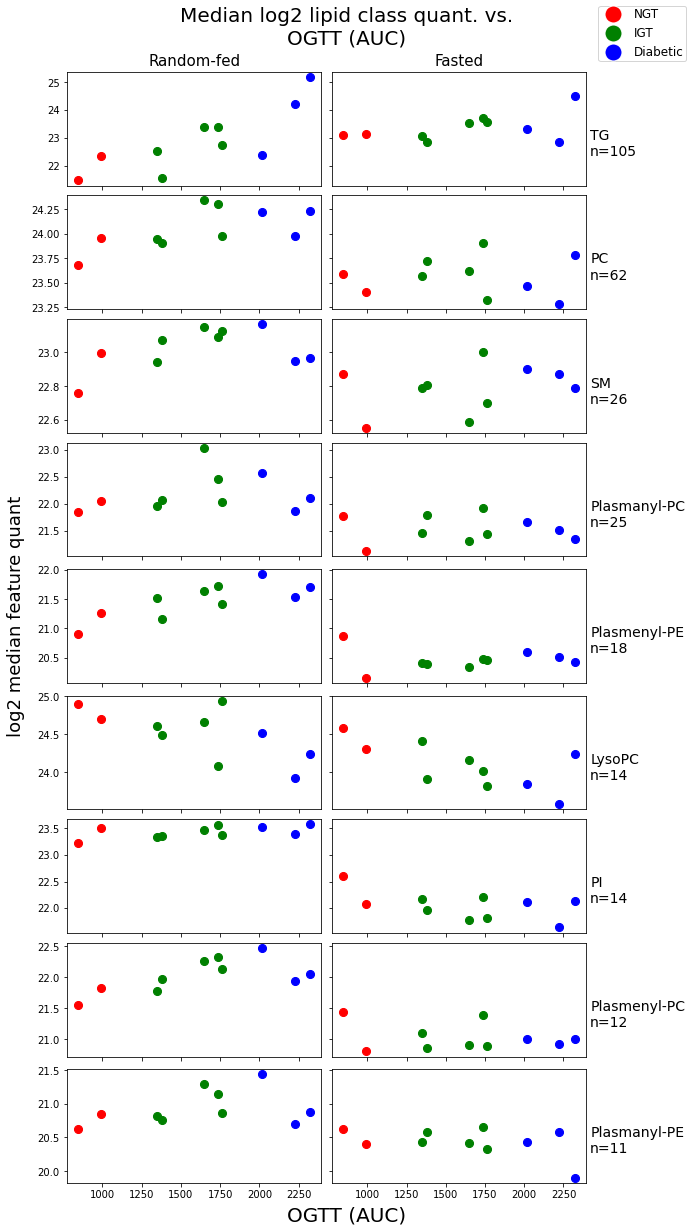

In [6]:
make_lipid_class_vs_metadata_scatterplot('OGTT (AUC)', 'OGTT')

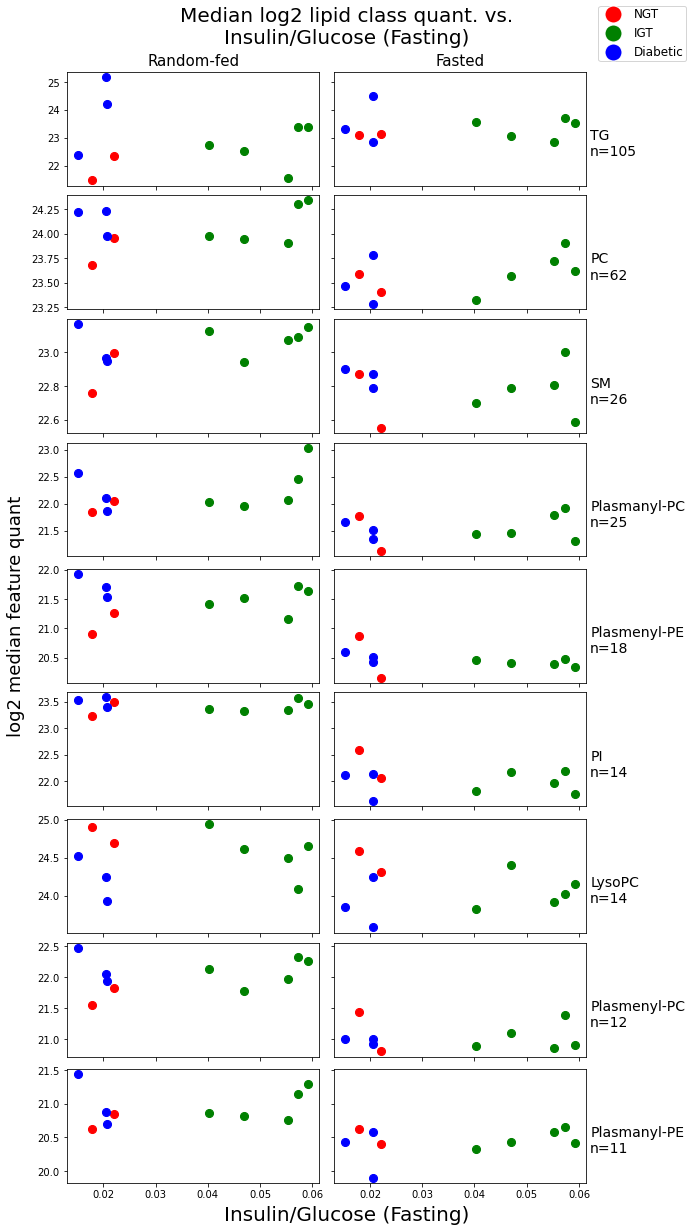

In [56]:
make_lipid_class_vs_metadata_scatterplot('Insulin/Glucose (Fasting)', 'Fasting Insulin-Glucose')

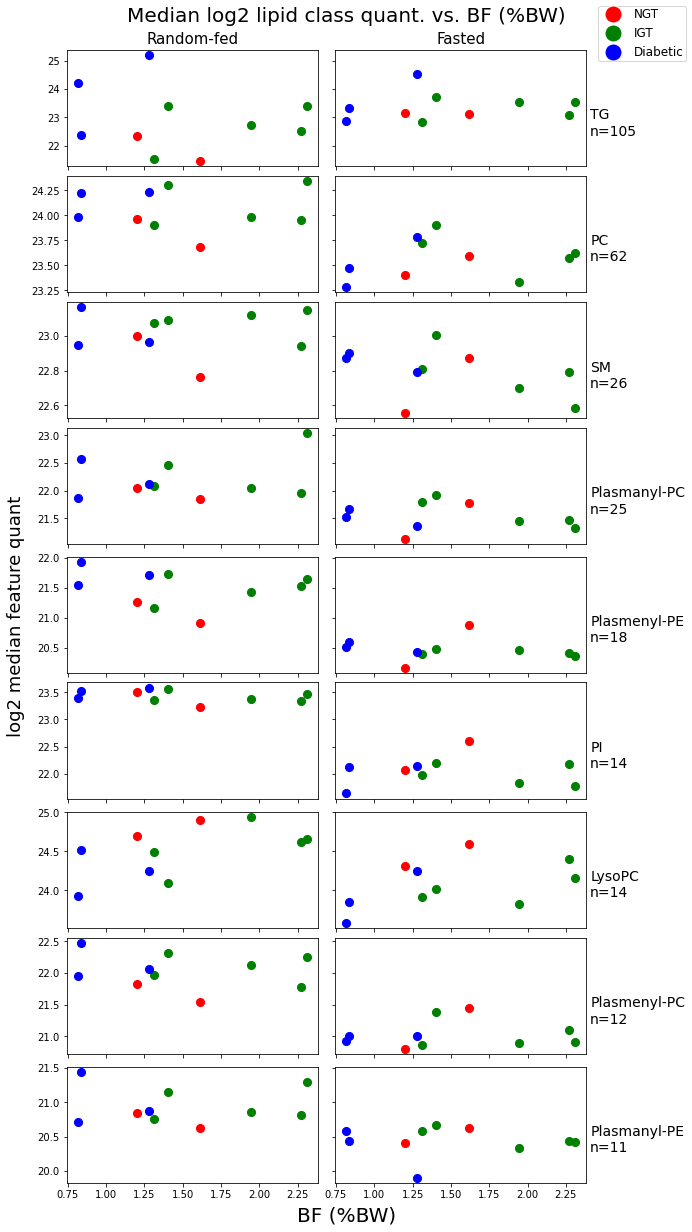

In [52]:
make_lipid_class_vs_metadata_scatterplot('BF (%BW)', 'BF-percentBW')

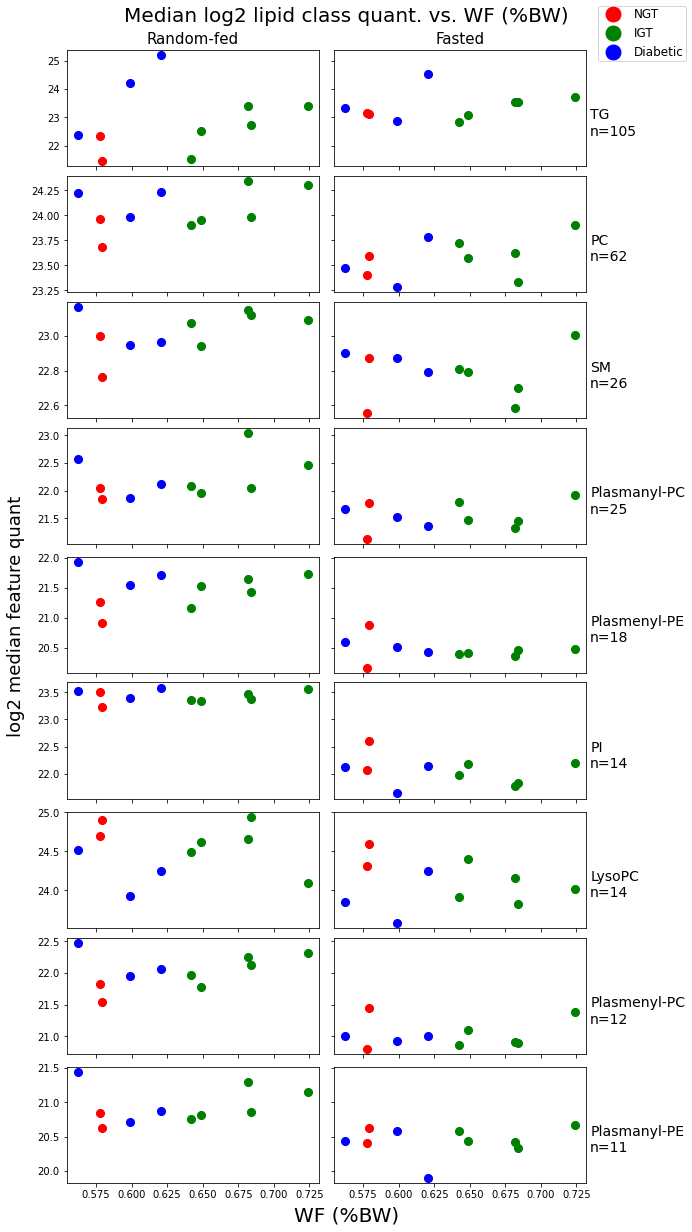

In [53]:
make_lipid_class_vs_metadata_scatterplot('WF (%BW)', 'WF-percentBW')

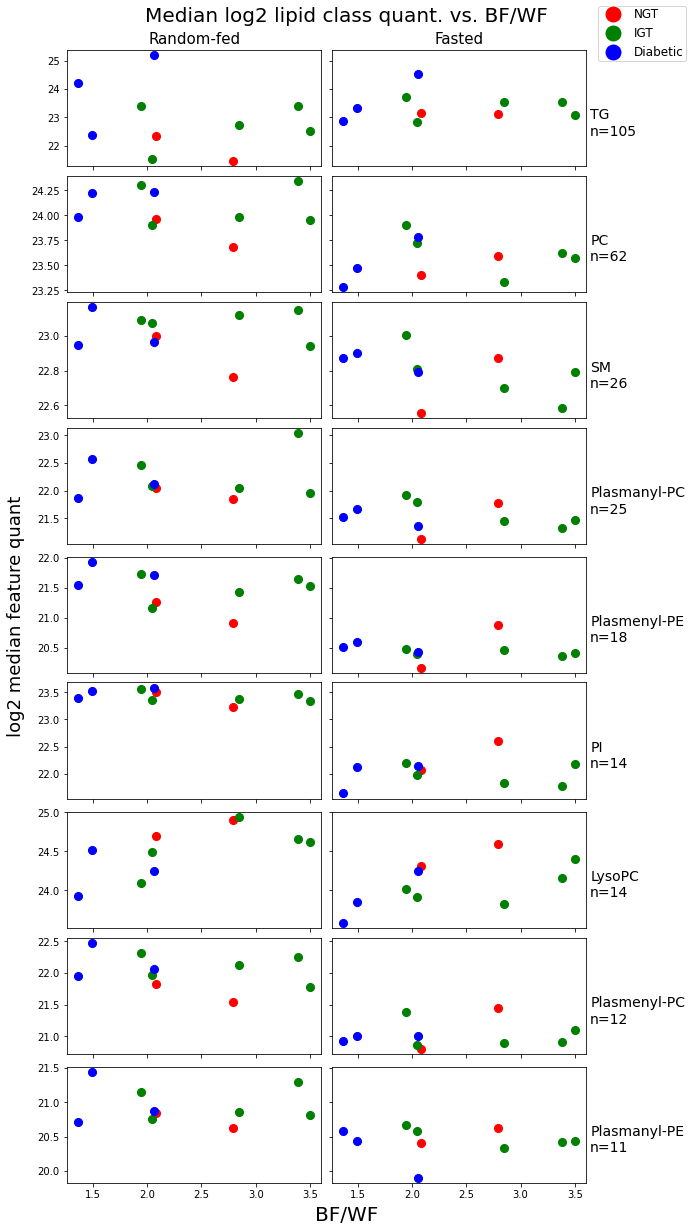

In [54]:
make_lipid_class_vs_metadata_scatterplot('BF/WF', 'BF-WF')

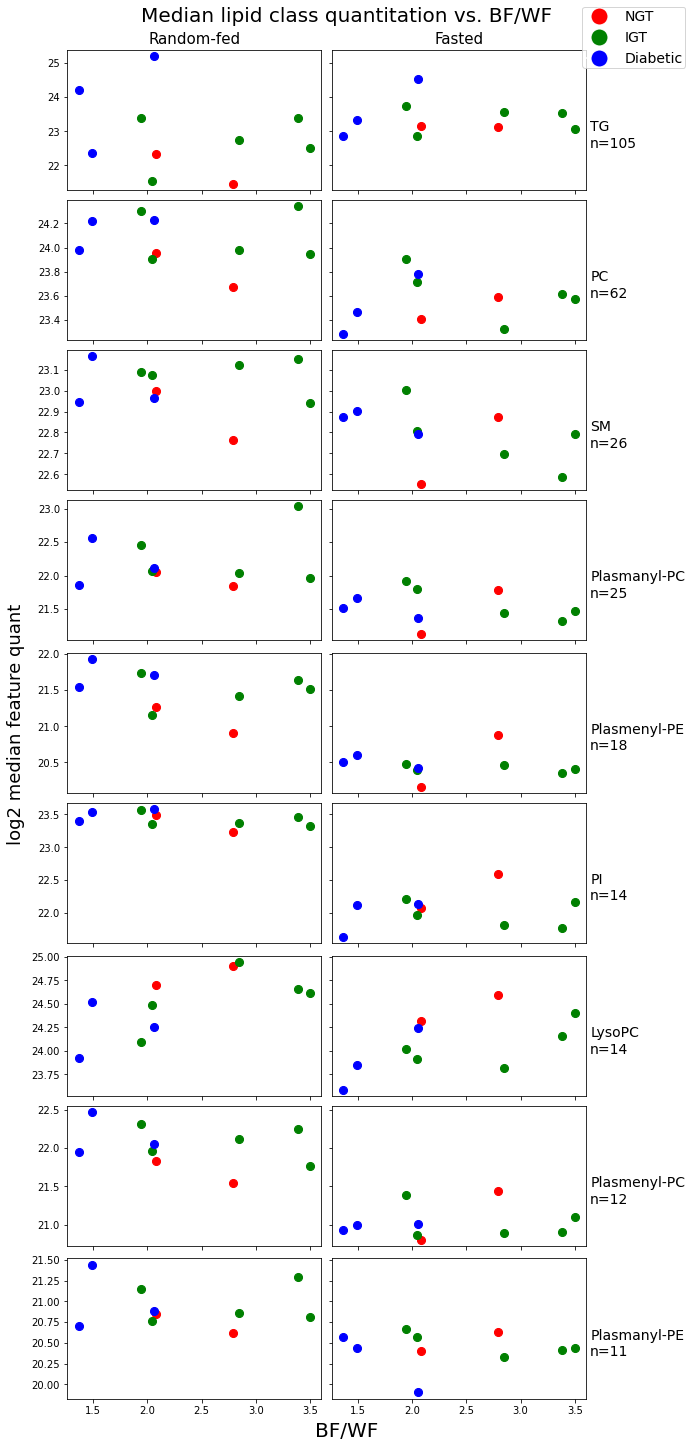

In [6]:
df = fr_filt

num_lipid_classes = 10
x_val_type = 'BF/WF'

lipid_classes = df['Lipid Class'].value_counts().iloc[1:num_lipid_classes].to_dict()

fig, axs = plt.subplots(nrows=num_lipid_classes-1, ncols=2, sharey='row', sharex=True, constrained_layout=True)
fig.set_size_inches((9.5, num_lipid_classes*2))

for i, lipid_class in enumerate(lipid_classes):
    for j, bg_type in enumerate(['RBG', 'FBG']):
        for k, animal in enumerate(animals_used):
        
            files = file_grouping[  (file_grouping['rat_label'] == animal) \
                                  & (file_grouping['bg_type'] == bg_type) \
                                  & (file_grouping['quant_file'] == True)]['fr_name']
    #         print(files)
#             df = df[df['Lipid Class'] == lipid_class][files]
#             print(df.shape)

            y_arr = np.log2(df[df['Lipid Class'] == lipid_class][files].mean(axis=1).median())
#             print(y_arr.shape)
            x = metadata.loc[str(animal), x_val_type]
            tol_type = animal_to_tolerance_dict[animal]
#             print(animal, tol_type)
            if tol_type == 'normal':
                color = 'red'
            elif tol_type == 'impaired':
                color = 'green'
            elif tol_type == 'diabetic':
                color='blue'

            ax = axs[i][j]
            ax.scatter(x, y_arr, color=color, s=65)
            
#             bg_type_title = ('Random-fed' if bg_type == 'RBG' else 'Fasted')
            if j == 1:
                ax.set_ylabel(f'{lipid_class}\nn={lipid_classes[lipid_class]}', 
                              rotation='horizontal',
                              horizontalalignment='left',
                              fontsize=14)
                ax.yaxis.set_label_position('right')
#                      f'\n{bg_type_title}')
            if i == 0:
                ax.set_title('Random-fed' if j == 0 else 'Fasted', fontsize=15)
            
#             ax.locator_params(axis='y', nbins=5)
            
# axs[0][1].suptitle('hi')
fig.suptitle(f'Median lipid class quantitation vs. {x_val_type}', fontsize=20)
fig.supylabel('log2 median feature quant', fontsize=18)
fig.supxlabel(x_val_type, fontsize=20);

# Legend
legend_elements = [Line2D([0], [0], color='white', marker='o', markerfacecolor='red', label='NGT', markersize=17),
                   Line2D([0], [0], color='white', marker='o', markerfacecolor='green', label='IGT', markersize=17),
                   Line2D([0], [0], color='white', marker='o', markerfacecolor='blue', label='Diabetic', markersize=17)]
fig.legend(handles=legend_elements, loc='upper right', 
           fontsize=14, borderpad=0.2) 

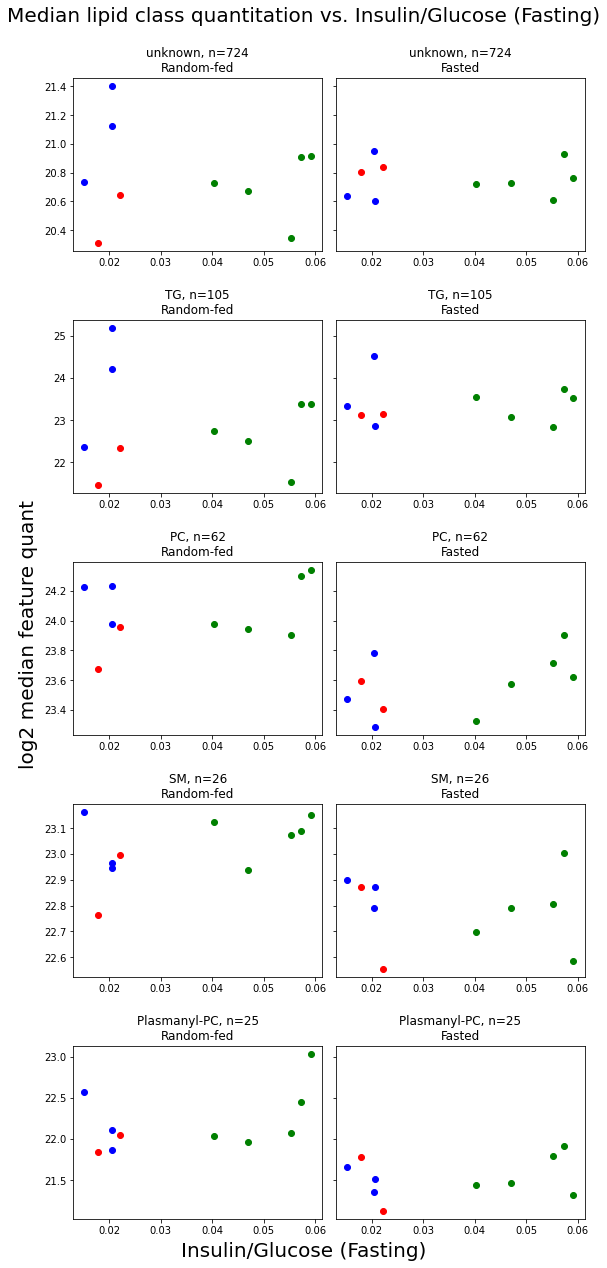

In [100]:
# Insulin/Glucose (Fasting) 
df = fr_filt

num_lipid_classes = 5

x_val_type = 'Insulin/Glucose (Fasting)'

lipid_classes = df['Lipid Class'].value_counts().iloc[0:num_lipid_classes].to_dict()

fig, axs = plt.subplots(nrows=num_lipid_classes, ncols=2, sharey='row', constrained_layout=True)
fig.set_size_inches((8, num_lipid_classes*3.5))

for i, lipid_class in enumerate(lipid_classes):
    for j, bg_type in enumerate(['RBG', 'FBG']):
        for k, animal in enumerate(animals_used):
        
            files = file_grouping[  (file_grouping['rat_label'] == animal) \
                                  & (file_grouping['bg_type'] == bg_type) \
                                  & (file_grouping['quant_file'] == True)]['fr_name']
    #         print(files)
#             df = df[df['Lipid Class'] == lipid_class][files]
#             print(df.shape)

            y_arr = np.log2(df[df['Lipid Class'] == lipid_class][files].mean(axis=1).median())
#             print(y_arr.shape)
            x = metadata.loc[str(animal), x_val_type]
            tol_type = animal_to_tolerance_dict[animal]
            if tol_type == 'normal':
                color = 'red'
            elif tol_type == 'impaired':
                color = 'green'
            elif tol_type == 'diabetic':
                color='blue'
#             x_arr = np.array([x] * y_arr.shape[0])
#             print(x.shape)
#             print(y_arr.shape)
#             print(x_arr.shape)
#             print(y_arr)
#             print(x_arr)

            ax = axs[i][j]
            ax.scatter(x, y_arr, color=color)
            bg_type_title = ('Random-fed' if bg_type == 'RBG' else 'Fasted')
            ax.set_title(f'\n{lipid_class}, n={lipid_classes[lipid_class]}'
                     f'\n{bg_type_title}')

fig.suptitle(f'Median lipid class quantitation vs. {x_val_type}', fontsize=20)
fig.supylabel('log2 median feature quant', fontsize=20)
fig.supxlabel(x_val_type, fontsize=20);

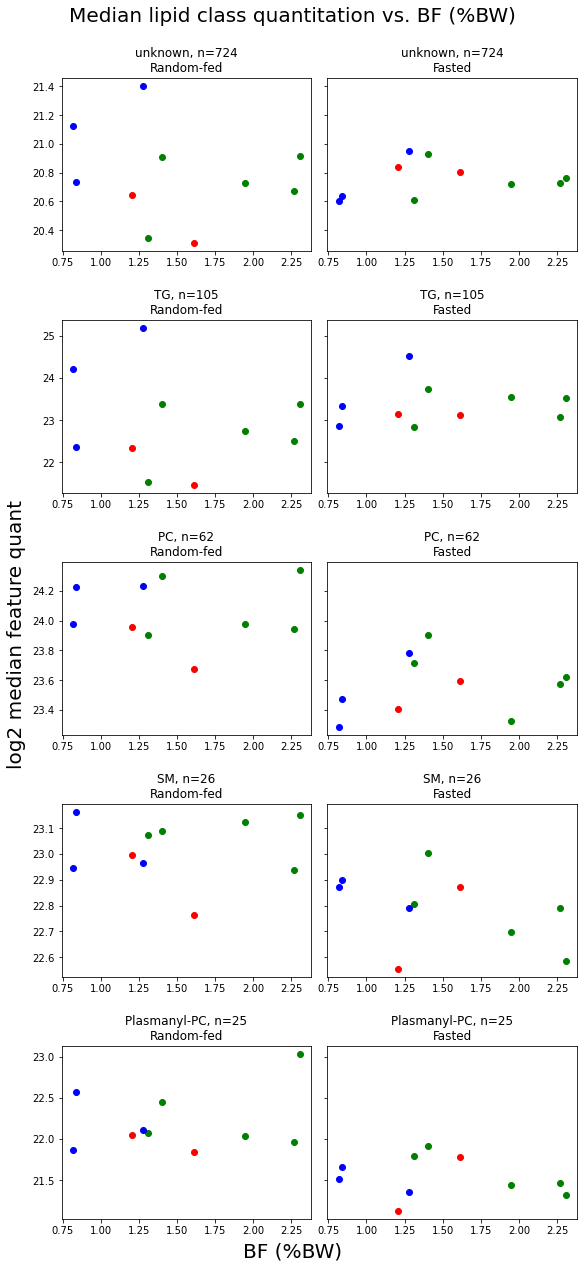

In [101]:
# BF (%BW) 
df = fr_filt

num_lipid_classes = 5
x_val_type = 'BF (%BW)'

lipid_classes = df['Lipid Class'].value_counts().iloc[0:num_lipid_classes].to_dict()

fig, axs = plt.subplots(nrows=num_lipid_classes, ncols=2, sharey='row', constrained_layout=True)
fig.set_size_inches((8, num_lipid_classes*3.5))

for i, lipid_class in enumerate(lipid_classes):
    for j, bg_type in enumerate(['RBG', 'FBG']):
        for k, animal in enumerate(animals_used):
        
            files = file_grouping[  (file_grouping['rat_label'] == animal) \
                                  & (file_grouping['bg_type'] == bg_type) \
                                  & (file_grouping['quant_file'] == True)]['fr_name']
    #         print(files)
#             df = df[df['Lipid Class'] == lipid_class][files]
#             print(df.shape)

            y_arr = np.log2(df[df['Lipid Class'] == lipid_class][files].mean(axis=1).median())
#             print(y_arr.shape)
            x = metadata.loc[str(animal), x_val_type]
            tol_type = animal_to_tolerance_dict[animal]
            if tol_type == 'normal':
                color = 'red'
            elif tol_type == 'impaired':
                color = 'green'
            elif tol_type == 'diabetic':
                color='blue'
#             x_arr = np.array([x] * y_arr.shape[0])
#             print(x.shape)
#             print(y_arr.shape)
#             print(x_arr.shape)
#             print(y_arr)
#             print(x_arr)

            ax = axs[i][j]
            ax.scatter(x, y_arr, color=color)
            bg_type_title = ('Random-fed' if bg_type == 'RBG' else 'Fasted')
            ax.set_title(f'\n{lipid_class}, n={lipid_classes[lipid_class]}'
                     f'\n{bg_type_title}')

fig.suptitle(f'Median lipid class quantitation vs. {x_val_type}', fontsize=20)
fig.supylabel('log2 median feature quant', fontsize=20)
fig.supxlabel(x_val_type, fontsize=20);

C:\Users\bjanderson23\anaconda3\lib\site-packages\ipykernel_launcher.py:50: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


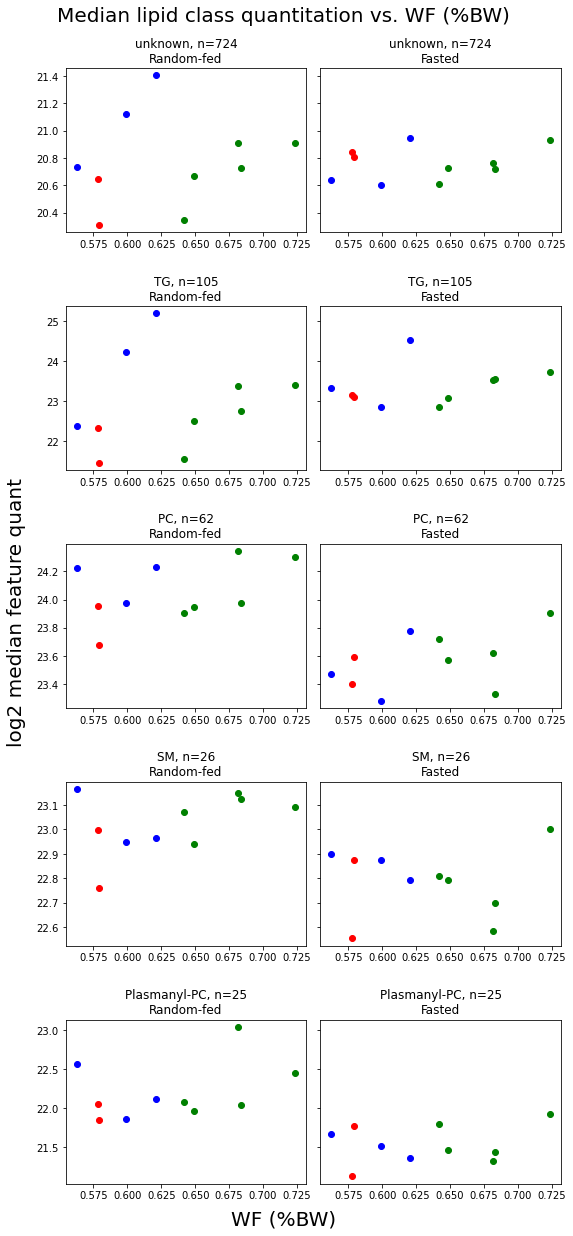

In [306]:
# WF (%BW) 
df = fr_filt

num_lipid_classes = 5
x_val_type = 'WF (%BW)'

lipid_classes = df['Lipid Class'].value_counts().iloc[0:num_lipid_classes].to_dict()

fig, axs = plt.subplots(nrows=num_lipid_classes, ncols=2, sharey='row', constrained_layout=True)
fig.set_size_inches((8, num_lipid_classes*3.5))

for i, lipid_class in enumerate(lipid_classes):
    for j, bg_type in enumerate(['RBG', 'FBG']):
        for k, animal in enumerate(animals_used):
        
            files = file_grouping[  (file_grouping['rat_label'] == animal) \
                                  & (file_grouping['bg_type'] == bg_type) \
                                  & (file_grouping['quant_file'] == True)]['fr_name']
    #         print(files)
#             df = df[df['Lipid Class'] == lipid_class][files]
#             print(df.shape)

            y_arr = np.log2(df[df['Lipid Class'] == lipid_class][files].mean(axis=1).median())
#             print(y_arr.shape)
            x = metadata.loc[str(animal), x_val_type]
            tol_type = animal_to_tolerance_dict[animal]
            if tol_type == 'normal':
                color = 'red'
            elif tol_type == 'impaired':
                color = 'green'
            elif tol_type == 'diabetic':
                color='blue'
#             x_arr = np.array([x] * y_arr.shape[0])
#             print(x.shape)
#             print(y_arr.shape)
#             print(x_arr.shape)
#             print(y_arr)
#             print(x_arr)

            ax = axs[i][j]
            ax.scatter(x, y_arr, color=color)
            bg_type_title = ('Random-fed' if bg_type == 'RBG' else 'Fasted')
            ax.set_title(f'\n{lipid_class}, n={lipid_classes[lipid_class]}'
                     f'\n{bg_type_title}')

fig.suptitle(f'Median lipid class quantitation vs. {x_val_type}', fontsize=20)
fig.supylabel('log2 median feature quant', fontsize=20)
fig.supxlabel(x_val_type, fontsize=20);

# plt.tight_layout()

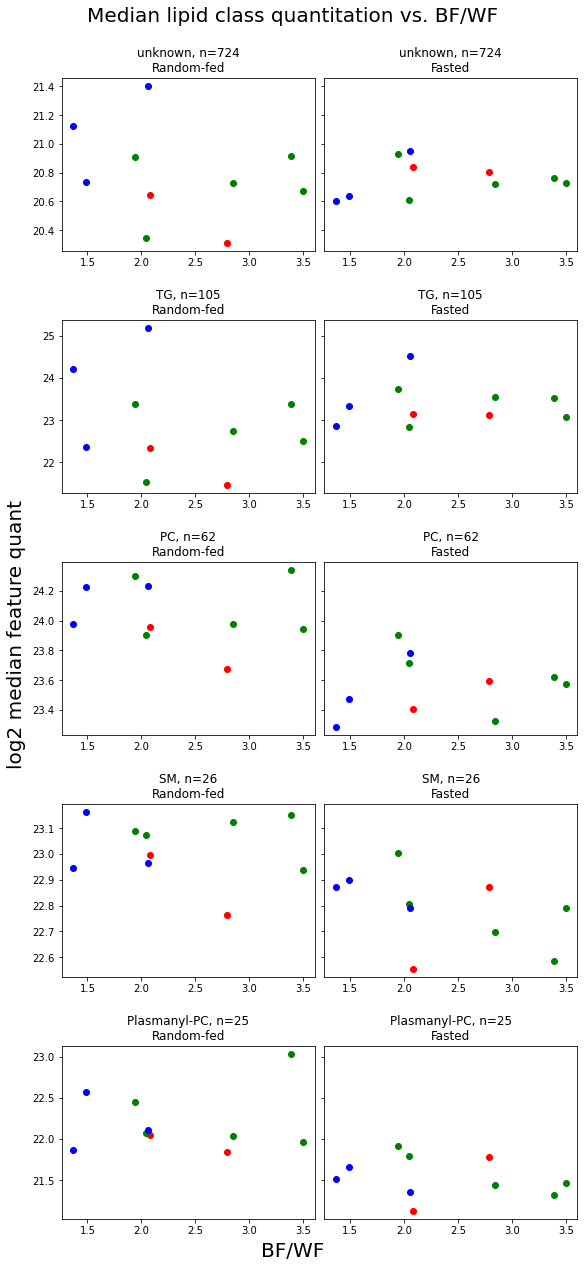

In [105]:
# BF/WF
df = fr_filt

num_lipid_classes = 5
x_val_type = 'BF/WF'

lipid_classes = df['Lipid Class'].value_counts().iloc[0:num_lipid_classes].to_dict()

fig, axs = plt.subplots(nrows=num_lipid_classes, ncols=2, sharey='row', constrained_layout=True)
fig.set_size_inches((8, num_lipid_classes*3.5))

for i, lipid_class in enumerate(lipid_classes):
    for j, bg_type in enumerate(['RBG', 'FBG']):
        for k, animal in enumerate(animals_used):
        
            files = file_grouping[  (file_grouping['rat_label'] == animal) \
                                  & (file_grouping['bg_type'] == bg_type) \
                                  & (file_grouping['quant_file'] == True)]['fr_name']
    #         print(files)
#             df = df[df['Lipid Class'] == lipid_class][files]
#             print(df.shape)

            y_arr = np.log2(df[df['Lipid Class'] == lipid_class][files].mean(axis=1).median())
#             print(y_arr.shape)
            x = metadata.loc[str(animal), x_val_type]
            tol_type = animal_to_tolerance_dict[animal]
#             print(animal, tol_type)
            if tol_type == 'normal':
                color = 'red'
            elif tol_type == 'impaired':
                color = 'green'
            elif tol_type == 'diabetic':
                color='blue'


            ax = axs[i][j]
            ax.scatter(x, y_arr, color=color)
            bg_type_title = ('Random-fed' if bg_type == 'RBG' else 'Fasted')
            ax.set_title(f'\n{lipid_class}, n={lipid_classes[lipid_class]}'
                     f'\n{bg_type_title}')

fig.suptitle(f'Median lipid class quantitation vs. {x_val_type}', fontsize=20)
fig.supylabel('log2 median feature quant', fontsize=20)
fig.supxlabel(x_val_type, fontsize=20);

<AxesSubplot:>

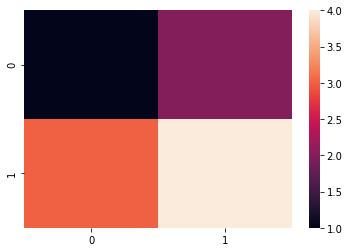

In [110]:
sns.heatmap([[1,2],[3,4]])

In [111]:
sns.heatmap?

In [115]:
from scipy.stats import pearsonr, kendalltau

In [ ]:
# Create a heatmap that pearson correlates each animal's continuous value phenotype as given in metadata
#   with the animal's mean feature quant across weeks. 
# Make two heat maps, one fasted one fed

In [120]:
df

,20210729_AJ_Toh_RatBloodGlucose_T1076M_20210405_10wk_FBG.raw (F27),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210322_8wk_FBG.raw (F9),20210729_AJ_Toh_RatBloodGlucose_T1093M_20210402_9wk_FBG.raw (F49),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4),20210729_AJ_Toh_RatBloodGlucose_T1091M_20210410_10wk_FBG.raw (F39),20210729_AJ_Toh_RatBloodGlucose_T1092M_20210406_9wk_RBG.raw (F44),20210729_AJ_Toh_RatBloodGlucose_T1093M_20210413_10wk_RBG.raw (F52),20210729_AJ_Toh_RatBloodGlucose_T1082M_20210405_10wk_FBG.raw (F33),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210401_9wk_RBG.raw (F6),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210402_9wk_FBG.raw (F55),...,20210729_AJ_Toh_RatBloodGlucose_T1092M_20210410_10wk_FBG.raw (F45),20210729_AJ_Toh_RatBloodGlucose_T1082M_20210325_8wk_RBG.raw (F30),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210325_8wk_RBG.raw (F10),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210410_10wk_FBG.raw (F63),20210729_AJ_Toh_RatBloodGlucose_T1093M_20210330_8wk_RBG.raw (F48),20210729_AJ_Toh_RatBloodGlucose_T1074M_20210329_9wk_FBG.raw (F19),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210401_9wk_RBG.raw (F14),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210330_8wk_RBG.raw (F54),20210729_AJ_Toh_RatBloodGlucose_T1092M_20210330_8wk_RBG.raw (F42),20210729_AJ_Toh_RatBloodGlucose_T1092M_20210413_10wk_RBG.raw (F46)
Unique Identifier,,,,,,,,,,,,,,,,,,,,,
unknown_679.05463_0.536,1.388749e+06,1.042187e+07,9.761684e+06,1.692144e+07,2.068893e+07,1.566949e+07,1.547355e+07,1.097696e+07,2.247304e+07,1.156896e+07,...,5.778441e+06,1.077300e+07,5.531159e+06,9.394720e+06,6.994745e+06,4.547156e+06,1.070997e+07,1.209106e+07,1.521186e+07,1.287036e+07
unknown_641.1087_0.537,3.035806e+06,2.518790e+07,2.175964e+07,5.397037e+07,4.496485e+07,3.211882e+07,2.880749e+07,2.718442e+07,3.485691e+07,3.207186e+07,...,2.658021e+07,1.363104e+07,1.093399e+07,2.191732e+07,1.450121e+07,4.983606e+06,5.986366e+06,2.470116e+07,2.958833e+07,2.500831e+07
unknown_951.15973_0.541,1.663567e+06,1.392568e+07,8.616873e+06,3.166872e+07,1.728079e+07,1.878361e+07,1.296374e+07,1.780597e+07,9.434457e+06,1.690386e+07,...,1.148005e+07,6.140714e+06,9.971310e+06,1.344883e+07,1.665659e+07,1.209164e+07,1.680713e+07,1.550470e+07,1.760080e+07,1.150525e+07
unknown_329.03067_0.542,2.215194e+07,1.177918e+08,1.096828e+08,6.605294e+07,1.668127e+08,1.695412e+08,1.790263e+08,1.574622e+08,2.032554e+08,1.465332e+08,...,1.553200e+08,7.681858e+07,1.261985e+08,1.173300e+08,7.420931e+07,1.044620e+08,1.560455e+08,1.314945e+08,1.515549e+08,9.377535e+07
unknown_969.13147_0.544,6.816564e+05,6.859485e+06,3.460303e+06,1.661334e+07,5.240092e+06,9.535690e+06,7.278404e+06,7.712598e+06,5.525663e+06,6.829185e+06,...,6.367112e+06,3.928397e+06,4.907544e+06,5.873010e+06,4.845314e+06,4.940118e+06,9.316513e+06,7.424281e+06,3.528424e+06,4.333287e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
unknown_897.82532_20.148,4.881645e+05,6.675371e+05,3.027164e+06,2.481922e+05,1.150220e+06,2.320982e+05,4.682044e+05,6.257882e+05,3.143235e+05,8.429923e+05,...,3.986714e+05,4.426777e+05,5.230112e+05,1.120074e+06,2.218954e+05,4.921157e+05,2.796698e+05,1.996501e+05,1.643549e+05,1.246668e+05
unknown_974.9118_20.163,1.149073e+05,1.687284e+05,1.123533e+06,3.533019e+05,2.597458e+05,2.808853e+05,2.899547e+05,2.312136e+04,4.740242e+05,3.282929e+05,...,8.217480e+04,5.414527e+05,4.122617e+05,4.072792e+05,1.708742e+05,1.952773e+05,4.560872e+05,1.067780e+05,3.509267e+05,2.051803e+05
unknown_593.58716_20.175,2.165170e+05,6.193117e+05,2.826364e+06,1.838481e+05,1.046119e+06,1.709479e+05,3.188858e+05,7.455019e+05,2.156390e+05,7.550607e+05,...,4.614638e+05,4.240754e+05,4.497607e+05,1.198124e+06,1.417538e+05,4.977968e+05,2.240424e+05,1.907102e+05,1.287581e+05,1.055227e+05


In [149]:
groups = file_grouping[file_grouping['fr_name'].isin(fr_quant_filenames_in_analytical_order)] \
            [['fr_name', 'rat_label', 'bg_type', 'week', 'glucose_tolerance', 'bg']]
groups['week'] = groups['week'].astype('int')
groups['rat_label'] = groups['rat_label'].astype('int')
groups = groups.set_index('fr_name')
groups = groups.T
groups

fr_name,20210729_AJ_Toh_RatBloodGlucose_T1076M_20210405_10wk_FBG.raw (F27),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210322_8wk_FBG.raw (F9),20210729_AJ_Toh_RatBloodGlucose_T1093M_20210402_9wk_FBG.raw (F49),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4),20210729_AJ_Toh_RatBloodGlucose_T1091M_20210410_10wk_FBG.raw (F39),20210729_AJ_Toh_RatBloodGlucose_T1092M_20210406_9wk_RBG.raw (F44),20210729_AJ_Toh_RatBloodGlucose_T1093M_20210413_10wk_RBG.raw (F52),20210729_AJ_Toh_RatBloodGlucose_T1082M_20210405_10wk_FBG.raw (F33),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210401_9wk_RBG.raw (F6),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210402_9wk_FBG.raw (F55),...,20210729_AJ_Toh_RatBloodGlucose_T1092M_20210410_10wk_FBG.raw (F45),20210729_AJ_Toh_RatBloodGlucose_T1082M_20210325_8wk_RBG.raw (F30),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210325_8wk_RBG.raw (F10),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210410_10wk_FBG.raw (F63),20210729_AJ_Toh_RatBloodGlucose_T1093M_20210330_8wk_RBG.raw (F48),20210729_AJ_Toh_RatBloodGlucose_T1074M_20210329_9wk_FBG.raw (F19),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210401_9wk_RBG.raw (F14),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210330_8wk_RBG.raw (F54),20210729_AJ_Toh_RatBloodGlucose_T1092M_20210330_8wk_RBG.raw (F42),20210729_AJ_Toh_RatBloodGlucose_T1092M_20210413_10wk_RBG.raw (F46)
rat_label,1076,1062,1093,1060,1091,1092,1093,1082,1060,1101,...,1092,1082,1062,1102,1093,1074,1062,1101,1092,1092
bg_type,FBG,FBG,FBG,RBG,FBG,RBG,RBG,FBG,RBG,FBG,...,FBG,RBG,RBG,FBG,RBG,FBG,RBG,RBG,RBG,RBG
week,10,8,9,8,10,9,10,10,9,9,...,10,8,8,10,8,9,9,8,8,10
glucose_tolerance,diabetic,impaired,normal,impaired,normal,impaired,normal,diabetic,impaired,diabetic,...,impaired,diabetic,impaired,impaired,normal,impaired,impaired,diabetic,impaired,impaired
bg,71.0,52.333333,64.0,225.0,48.5,70.5,69.5,50.0,83.0,43.0,...,51.5,272.0,256.5,43.333333,82.0,51.5,250.5,459.5,76.0,59.0


In [150]:
df = fr_filt[fr_quant_filenames_in_analytical_order]
df.append(groups)

,20210729_AJ_Toh_RatBloodGlucose_T1076M_20210405_10wk_FBG.raw (F27),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210322_8wk_FBG.raw (F9),20210729_AJ_Toh_RatBloodGlucose_T1093M_20210402_9wk_FBG.raw (F49),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4),20210729_AJ_Toh_RatBloodGlucose_T1091M_20210410_10wk_FBG.raw (F39),20210729_AJ_Toh_RatBloodGlucose_T1092M_20210406_9wk_RBG.raw (F44),20210729_AJ_Toh_RatBloodGlucose_T1093M_20210413_10wk_RBG.raw (F52),20210729_AJ_Toh_RatBloodGlucose_T1082M_20210405_10wk_FBG.raw (F33),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210401_9wk_RBG.raw (F6),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210402_9wk_FBG.raw (F55),...,20210729_AJ_Toh_RatBloodGlucose_T1092M_20210410_10wk_FBG.raw (F45),20210729_AJ_Toh_RatBloodGlucose_T1082M_20210325_8wk_RBG.raw (F30),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210325_8wk_RBG.raw (F10),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210410_10wk_FBG.raw (F63),20210729_AJ_Toh_RatBloodGlucose_T1093M_20210330_8wk_RBG.raw (F48),20210729_AJ_Toh_RatBloodGlucose_T1074M_20210329_9wk_FBG.raw (F19),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210401_9wk_RBG.raw (F14),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210330_8wk_RBG.raw (F54),20210729_AJ_Toh_RatBloodGlucose_T1092M_20210330_8wk_RBG.raw (F42),20210729_AJ_Toh_RatBloodGlucose_T1092M_20210413_10wk_RBG.raw (F46)
unknown_679.05463_0.536,1388749.128,10421872.865824,9761684.323293,16921439.53804,20688928.960266,15669494.721326,15473550.71764,10976959.20458,22473043.158375,11568964.50206,...,5778440.641962,10772995.12238,5531159.089789,9394719.924106,6994744.524707,4547156.482537,10709969.416478,12091064.707953,15211855.644512,12870363.786186
unknown_641.1087_0.537,3035805.818,25187896.703531,21759637.21643,53970365.787381,44964853.999588,32118819.369369,28807488.042992,27184415.156991,34856906.590804,32071862.575306,...,26580209.040746,13631037.452342,10933989.914237,21917324.579216,14501208.871636,4983605.791358,5986365.514152,24701156.987165,29588330.663132,25008307.122512
unknown_951.15973_0.541,1663566.711,13925677.102927,8616873.409517,31668716.622149,17280787.412394,18783610.036426,12963744.533145,17805969.390801,9434457.214292,16903858.872521,...,11480054.641035,6140714.458471,9971309.668317,13448834.403309,16656585.835021,12091643.69317,16807127.99205,15504703.058349,17600796.304189,11505247.236564
unknown_329.03067_0.542,22151942.96,117791789.303919,109682830.894935,66052943.57828,166812715.923247,169541225.239944,179026330.616622,157462193.916065,203255410.258634,146533218.048722,...,155319951.375407,76818576.539242,126198478.483618,117330026.998548,74209307.985385,104462043.706204,156045511.878862,131494549.000338,151554920.09114,93775353.834969
unknown_969.13147_0.544,681656.4071,6859485.144289,3460302.937599,16613341.086377,5240092.024078,9535689.552105,7278404.227445,7712597.657775,5525662.840195,6829185.243302,...,6367111.796283,3928397.339482,4907543.901523,5873009.985889,4845314.280741,4940117.900333,9316513.022112,7424280.702594,3528424.001508,4333286.595399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rat_label,1076,1062,1093,1060,1091,1092,1093,1082,1060,1101,...,1092,1082,1062,1102,1093,1074,1062,1101,1092,1092
bg_type,FBG,FBG,FBG,RBG,FBG,RBG,RBG,FBG,RBG,FBG,...,FBG,RBG,RBG,FBG,RBG,FBG,RBG,RBG,RBG,RBG
week,10,8,9,8,10,9,10,10,9,9,...,10,8,8,10,8,9,9,8,8,10
glucose_tolerance,diabetic,impaired,normal,impaired,normal,impaired,normal,diabetic,impaired,diabetic,...,impaired,diabetic,impaired,impaired,normal,impaired,impaired,diabetic,impaired,impaired


In [196]:
df = fr_filt[fr_quant_filenames_in_analytical_order] # + ['Lipid Class']]
df = df.append(groups).T
df['week'] = df['week'].astype('int')
df['rat_label'] = df['rat_label'].astype('int')
df = df.set_index([df.index, 'rat_label', 'bg_type', 'week', 'glucose_tolerance', 'bg']).T
feature_class = fr_filt['Lipid Class']
feature_class_mi = pd.MultiIndex.from_frame(feature_class.reset_index())
df = df.set_index(feature_class_mi)

df

,,20210729_AJ_Toh_RatBloodGlucose_T1076M_20210405_10wk_FBG.raw (F27),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210322_8wk_FBG.raw (F9),20210729_AJ_Toh_RatBloodGlucose_T1093M_20210402_9wk_FBG.raw (F49),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4),20210729_AJ_Toh_RatBloodGlucose_T1091M_20210410_10wk_FBG.raw (F39),20210729_AJ_Toh_RatBloodGlucose_T1092M_20210406_9wk_RBG.raw (F44),20210729_AJ_Toh_RatBloodGlucose_T1093M_20210413_10wk_RBG.raw (F52),20210729_AJ_Toh_RatBloodGlucose_T1082M_20210405_10wk_FBG.raw (F33),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210401_9wk_RBG.raw (F6),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210402_9wk_FBG.raw (F55),...,20210729_AJ_Toh_RatBloodGlucose_T1092M_20210410_10wk_FBG.raw (F45),20210729_AJ_Toh_RatBloodGlucose_T1082M_20210325_8wk_RBG.raw (F30),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210325_8wk_RBG.raw (F10),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210410_10wk_FBG.raw (F63),20210729_AJ_Toh_RatBloodGlucose_T1093M_20210330_8wk_RBG.raw (F48),20210729_AJ_Toh_RatBloodGlucose_T1074M_20210329_9wk_FBG.raw (F19),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210401_9wk_RBG.raw (F14),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210330_8wk_RBG.raw (F54),20210729_AJ_Toh_RatBloodGlucose_T1092M_20210330_8wk_RBG.raw (F42),20210729_AJ_Toh_RatBloodGlucose_T1092M_20210413_10wk_RBG.raw (F46)
,rat_label,1076,1062,1093,1060,1091,1092,1093,1082,1060,1101,...,1092,1082,1062,1102,1093,1074,1062,1101,1092,1092
,bg_type,FBG,FBG,FBG,RBG,FBG,RBG,RBG,FBG,RBG,FBG,...,FBG,RBG,RBG,FBG,RBG,FBG,RBG,RBG,RBG,RBG
,week,10,8,9,8,10,9,10,10,9,9,...,10,8,8,10,8,9,9,8,8,10
,glucose_tolerance,diabetic,impaired,normal,impaired,normal,impaired,normal,diabetic,impaired,diabetic,...,impaired,diabetic,impaired,impaired,normal,impaired,impaired,diabetic,impaired,impaired
,bg,71.000000,52.333333,64.000000,225.000000,48.500000,70.500000,69.500000,50.000000,83.000000,43.000000,...,51.500000,272.000000,256.500000,43.333333,82.000000,51.500000,250.500000,459.500000,76.000000,59.000000
Unique Identifier,Lipid Class,,,,,,,,,,,,,,,,,,,,,
unknown_679.05463_0.536,unknown,1388749.128,10421872.865824,9761684.323293,16921439.53804,20688928.960266,15669494.721326,15473550.71764,10976959.20458,22473043.158375,11568964.50206,...,5778440.641962,10772995.12238,5531159.089789,9394719.924106,6994744.524707,4547156.482537,10709969.416478,12091064.707953,15211855.644512,12870363.786186
unknown_641.1087_0.537,unknown,3035805.818,25187896.703531,21759637.21643,53970365.787381,44964853.999588,32118819.369369,28807488.042992,27184415.156991,34856906.590804,32071862.575306,...,26580209.040746,13631037.452342,10933989.914237,21917324.579216,14501208.871636,4983605.791358,5986365.514152,24701156.987165,29588330.663132,25008307.122512
unknown_951.15973_0.541,unknown,1663566.711,13925677.102927,8616873.409517,31668716.622149,17280787.412394,18783610.036426,12963744.533145,17805969.390801,9434457.214292,16903858.872521,...,11480054.641035,6140714.458471,9971309.668317,13448834.403309,16656585.835021,12091643.69317,16807127.99205,15504703.058349,17600796.304189,11505247.236564
unknown_329.03067_0.542,unknown,22151942.96,117791789.303919,109682830.894935,66052943.57828,166812715.923247,169541225.239944,179026330.616622,157462193.916065,203255410.258634,146533218.048722,...,155319951.375407,76818576.539242,126198478.483618,117330026.998548,74209307.985385,104462043.706204,156045511.878862,131494549.000338,151554920.09114,93775353.834969


In [274]:
# df.groupby(by='week', axis=1).median()
for group in df.groupby(by='Lipid Class'):
    print(group[1].mean())

                                                                       rat_label  bg_type  week  glucose_tolerance  bg        
20210729_AJ_Toh_RatBloodGlucose_T1076M_20210405_10wk_FBG.raw (F27)     1076       FBG      10    diabetic           71.000000     4.159943e+06
20210729_AJ_Toh_RatBloodGlucose_T1062M_20210322_8wk_FBG.raw (F9)       1062       FBG      8     impaired           52.333333     7.821854e+06
20210729_AJ_Toh_RatBloodGlucose_T1093M_20210402_9wk_FBG.raw (F49)      1093       FBG      9     normal             64.000000     1.359071e+07
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4)       1060       RBG      8     impaired           225.000000    1.891575e+06
20210729_AJ_Toh_RatBloodGlucose_T1091M_20210410_10wk_FBG.raw (F39)     1091       FBG      10    normal             48.500000     1.212026e+07
20210729_AJ_Toh_RatBloodGlucose_T1092M_20210406_9wk_RBG.raw (F44)      1092       RBG      9     impaired           70.500000     1.212389e+06
20210729_AJ_Toh

                                                                       rat_label  bg_type  week  glucose_tolerance  bg        
20210729_AJ_Toh_RatBloodGlucose_T1076M_20210405_10wk_FBG.raw (F27)     1076       FBG      10    diabetic           71.000000     1.884797e+06
20210729_AJ_Toh_RatBloodGlucose_T1062M_20210322_8wk_FBG.raw (F9)       1062       FBG      8     impaired           52.333333     2.182206e+06
20210729_AJ_Toh_RatBloodGlucose_T1093M_20210402_9wk_FBG.raw (F49)      1093       FBG      9     normal             64.000000     2.364434e+06
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4)       1060       RBG      8     impaired           225.000000    5.029306e+06
20210729_AJ_Toh_RatBloodGlucose_T1091M_20210410_10wk_FBG.raw (F39)     1091       FBG      10    normal             48.500000     2.295949e+06
20210729_AJ_Toh_RatBloodGlucose_T1092M_20210406_9wk_RBG.raw (F44)      1092       RBG      9     impaired           70.500000     5.525997e+06
20210729_AJ_Toh